# Ollama Function Calling
- By Marcelo Rovai @17Oct25

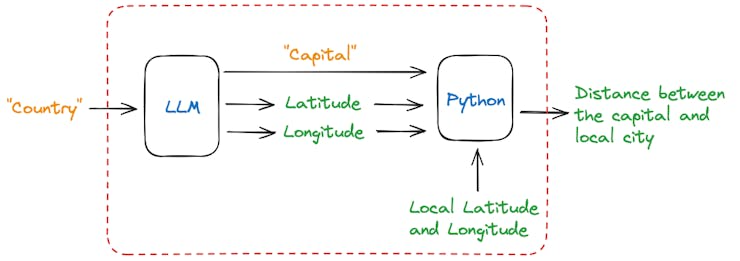

## Importing Libraries

- **haversine**: A function from the haversine library that calculates the distance between two geographic points using the Haversine formula.
- **pydantic**: Provides data validation and settings management using Python-type annotations. It's used to define the structure of expected response data.

In [1]:
import time
from haversine import haversine
from pydantic import BaseModel, Field
from ollama import chat

## Defining Input and Model

On a python string, it is possible get the country from command-line arguments

In this notebook, we should define the country name as a variable

In [2]:
country = "France"

In [3]:
MODEL = 'llama3.2:3B'   # The name of the model to be used
mylat = -33.33          # Latitude of Santiago de Chile
mylon = -70.51          # Longitude of Santiago de Chile

## Defining the Response Data Structure

**CityCoord**: A Pydantic model that defines the expected structure of the response from the LLM. It expects three fields: city (name of the city), lat (latitude), and lon (longitude).

In [5]:
class CityCoord(BaseModel):
    city: str = Field(..., description="Name of the city")
    lat: float = Field(..., description="Decimal Latitude of the city")
    lon: float = Field(..., description="Decimal Longitude of the city")

## Generating the Response

In [6]:
response = chat(
    model=MODEL,
    messages=[{
        "role": "user",
        "content": f"Return the capital city of {country}, with its decimal latitude and longitude."
    }],
    format=CityCoord.model_json_schema(),  # Structured JSON format
    options={"temperature": 0}
)

In [11]:
response.message.content

'{ "city": "Paris", "lat": 48.8567, "lon": 2.3522 }'

In [18]:
resp = CityCoord.model_validate_json(response.message.content)
resp

CityCoord(city='Paris', lat=48.8567, lon=2.3522)

In [19]:
resp.city, resp.lat, resp.lon

('Paris', 48.8567, 2.3522)

## Calculating the Distance

In [20]:
distance = haversine((mylat, mylon), (resp.lat, resp.lon), unit='km')
distance

11629.179503917561

In [36]:
print(f"Santiago de Chile is about {int(round(distance, -1)):,} kilometers away from {resp.city}.")

Santiago de Chile is about 11,630 kilometers away from Paris.


## Creating a function

In [28]:
def calc_dist(country, model=MODEL):
    
    start_time = time.perf_counter()  # Start timing

    # Ask Ollama for structured data
    response = chat(
        model=model,
        messages=[{
            "role": "user",
            "content": f"Return the capital city of {country}, with its decimal latitude and longitude."
        }],
        format=CityCoord.model_json_schema(),  # Structured JSON format
        options={"temperature": 0}
    )

    resp = CityCoord.model_validate_json(response.message.content)

    distance = haversine((mylat, mylon), (resp.lat, resp.lon), unit='km')
    
    end_time = time.perf_counter()  # End timing
    elapsed_time = end_time - start_time  # Calculate elapsed time
    
    print(f"\nSantiago de Chile is about {int(round(distance, -1)):,} kilometers away from {resp.city}.") 
    print(f"[INFO] ==> {MODEL}: {elapsed_time:.1f} seconds")


In [29]:
calc_dist('france', model=MODEL)


Santiago de Chile is about 11,630 kilometers away from Paris.
[INFO] ==> llama3.2:3B: 5.1 seconds


In [30]:
calc_dist('colombia')


Santiago de Chile is about 4,240 kilometers away from Bogotá.
[INFO] ==> llama3.2:3B: 6.9 seconds


In [31]:
calc_dist('united states')


Santiago de Chile is about 8,060 kilometers away from Washington D.C..
[INFO] ==> llama3.2:3B: 7.5 seconds


### Using Llama3.2:1B

In [35]:
MODEL = 'llama3.2:1B'
calc_dist('france')
calc_dist('colombia')
calc_dist('united states')


Santiago de Chile is about 11,630 kilometers away from Paris.
[INFO] ==> llama3.2:1B: 7.1 seconds

Santiago de Chile is about 4,240 kilometers away from Bogotá.
[INFO] ==> llama3.2:1B: 7.5 seconds

Santiago de Chile is about 8,060 kilometers away from Washington D.C..
[INFO] ==> llama3.2:1B: 8.3 seconds


### Using gemma3n:e2b

In [32]:
MODEL = 'gemma3n:e2b'
calc_dist('france')
calc_dist('colombia')
calc_dist('united states')


Santiago de Chile is about 11,630 kilometers away from Paris.
[INFO] ==> gemma3n:e2b: 6.2 seconds

Santiago de Chile is about 4,240 kilometers away from Bogotá.
[INFO] ==> gemma3n:e2b: 7.0 seconds

Santiago de Chile is about 8,060 kilometers away from Washington D.C..
[INFO] ==> gemma3n:e2b: 7.8 seconds


### Using gemma3:4b

In [33]:
MODEL = 'gemma3:4b'
calc_dist('france')
calc_dist('colombia')
calc_dist('united states')


Santiago de Chile is about 11,630 kilometers away from Paris.
[INFO] ==> gemma3:4b: 6.3 seconds

Santiago de Chile is about 4,240 kilometers away from Bogotá.
[INFO] ==> gemma3:4b: 6.8 seconds

Santiago de Chile is about 8,060 kilometers away from Washington D.C..
[INFO] ==> gemma3:4b: 8.0 seconds
